In this Notebook, I am working through the Income Prediction problem associated with the Adult Income Census dataset. The goal is to accurately predict whether or not someone is making more or less than $50,000 a year.

Details of Survey and final_weight parameter and other basic information: https://www.bls.gov/opub/hom/cps/pdf/cps.htm

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', font_scale=1.3)


In [2]:
df = pd.read_csv('adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


# Data Cleaning

we can see that values within features like workclass, occupation are not available

In [3]:
df.rename(columns={'education.num':'education_num', 'marital.status':'marital_status',
                    'capital.loss':'capital_loss', 'hours.per.week':'hours_per_week',
                    'native.country' :'native_country','capital.gain':'capital_gain'}, inplace=True)

In [4]:
# replacing '?' with np.NaN
df.replace(to_replace='?',value=np.NaN, inplace=True)

In [5]:
# lets find out the percentage of nulls in empty values column so that we can correct imputation
empty = {}
for col in df.columns.tolist():
    if df[col].isnull().sum() > 0:  # if any nulls present in the column
        empty[str(col)] = ((df[col].isnull().sum()) / len(df[col])) * 100
empty

{'workclass': 5.638647461687294,
 'occupation': 5.660145572924664,
 'native_country': 1.7904855501980899}

Since the percentage of nan values in a column is very low we can empute them with mode stratergy

In [6]:
mode_value = []
mode_value.append(df['workclass'].mode()[0])
mode_value.append(df['occupation'].mode()[0])
mode_value.append(df['native_country'].mode()[0])
df['workclass'].fillna(mode_value[0],inplace=True)
df['occupation'].fillna(mode_value[1],inplace = True)
df['native_country'].fillna(mode_value[2], inplace=True)

In [7]:
df.isnull().any().sum()

0

# Exploratory Data Analysis

## Categorical Variable with respect to Target variable

### 1. workclass

reference for annotation: https://wellsr.com/python/seaborn-barplot-tutorial-for-python/

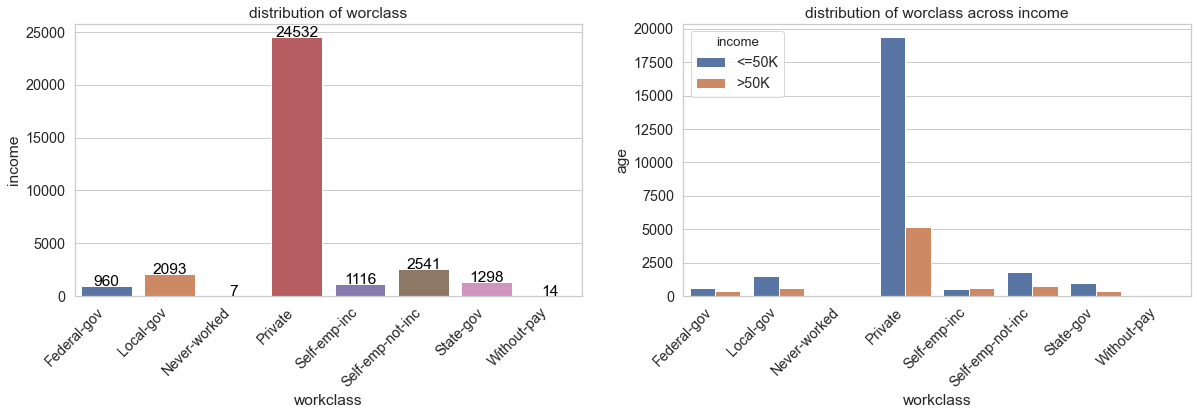

In [190]:
fig, axes = plt.subplots(1,2, figsize=(20,5))


# distribution of worclass
temp = (df.groupby('workclass').count()['income']).reset_index()
figure = sns.barplot(x=temp.workclass, y=temp.income, ax=axes[0])
plt.setp(figure.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure.set_title('distribution of worclass')
for index, row in temp.iterrows():
    figure.text(row.name,row.income, row.income, color='black', ha="center")
    
# distribution of worclass across income 
temp1 = df.groupby(['workclass','income']).age.count().reset_index()
figure1 = sns.barplot(x='workclass' , y= 'age', hue='income',data=temp1, ax=axes[1])
plt.setp(figure1.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure1.set_title('distribution of worclass across income')
plt.show()


1. We can see that dataset contains higher number of people from Private Sector.
2. Priavte sector has higher number of people with less than 50k salary.
3. only self-emp-inc category has income of <50k as well as more income of >50k in equal proportion

### 2. education

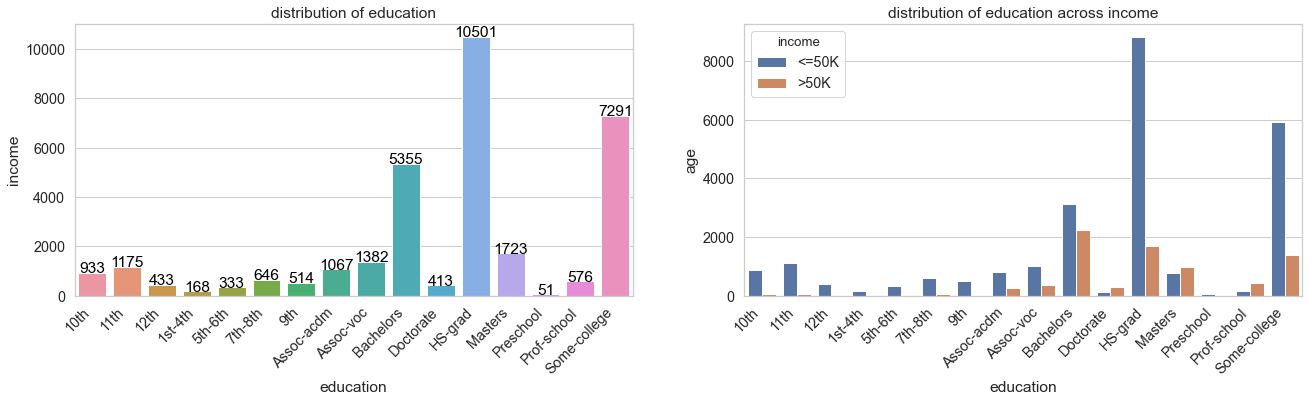

In [212]:
fig, axes = plt.subplots(1,2, figsize=(22,5))


# distribution of worclass
temp = (df.groupby('education').count()['income']).reset_index()
figure = sns.barplot(x=temp.education, y=temp.income, ax=axes[0])
plt.setp(figure.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure.set_title('distribution of education')
for index, row in temp.iterrows():
    figure.text(row.name,row.income, row.income, color='black', ha="center")
    
# distribution of worclass across income 
temp1 = df.groupby(['education','income']).age.count().reset_index()
figure1 = sns.barplot(x='education' , y= 'age', hue='income',data=temp1, ax=axes[1])
plt.setp(figure1.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure1.set_title('distribution of education across income')
plt.show()


1. In Overall population, there are more number of people with < 50k salary.
2. People who are HS-graduated or has done some College has higher number of people with salary up to 50k.
3. People those are Doctor, Professor, obtained Masters have more than 50k salary as compared to others which is quite obvious.
4. People who have done Bachelors have almost same number of people in both Categories.

### 2. Marital_status

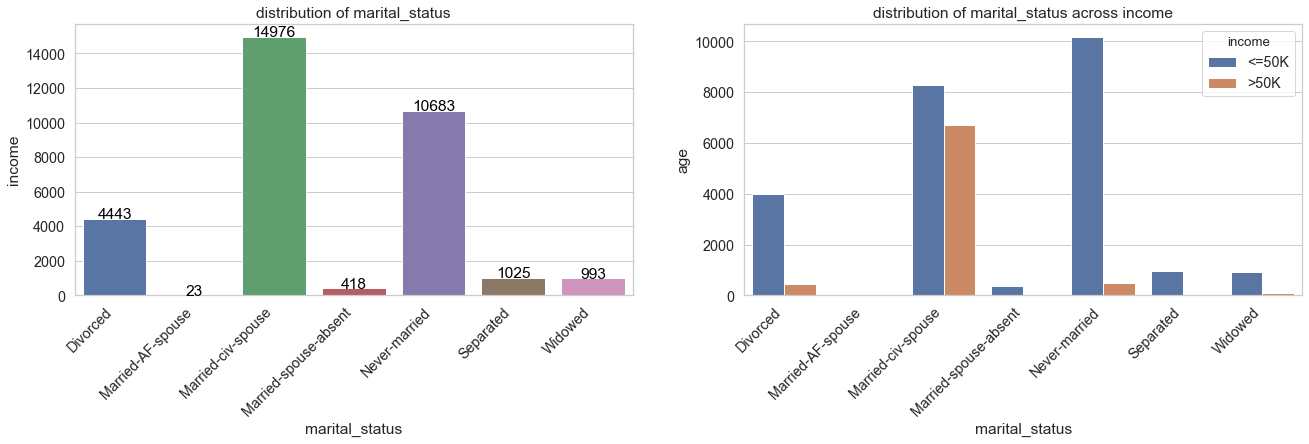

In [193]:
fig, axes = plt.subplots(1,2, figsize=(22,5))


# distribution of worclass
temp = (df.groupby('marital_status').count()['income']).reset_index()
figure = sns.barplot(x=temp.marital_status, y=temp.income, ax=axes[0])
plt.setp(figure.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure.set_title('distribution of marital_status')
for index, row in temp.iterrows():
    figure.text(row.name,row.income, row.income, color='black', ha="center")
    
# distribution of worclass across income 
temp1 = df.groupby(['marital_status','income']).age.count().reset_index()
figure1 = sns.barplot(x='marital_status' , y= 'age', hue='income',data=temp1, ax=axes[1])
plt.setp(figure1.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure1.set_title('distribution of marital_status across income')
plt.show()


1. Bachelors category have maximum number of with salary up 50k.
2. [marital status of an individual. Married-civ-spouse corresponds to a civilian spouse while Married-AF-spouse is a spouse in the Armed Forces.] those People who are married and have civilian Spouse have highse number of people with more than 50k salary. 

### 3. occupation

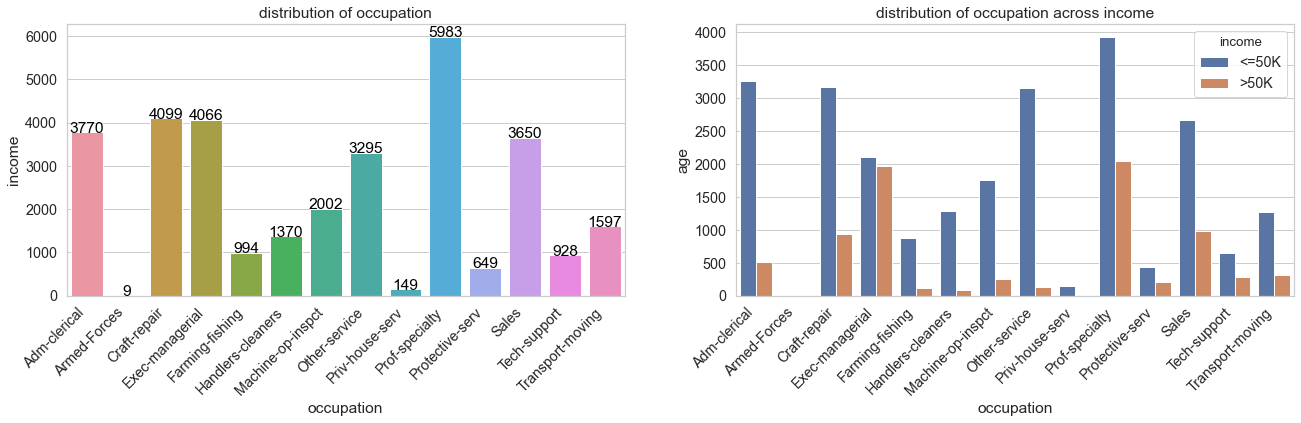

In [194]:
fig, axes = plt.subplots(1,2, figsize=(22,5))


# distribution of worclass
temp = (df.groupby('occupation').count()['income']).reset_index()
figure = sns.barplot(x=temp.occupation, y=temp.income, ax=axes[0])
plt.setp(figure.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure.set_title('distribution of occupation')
for index, row in temp.iterrows():
    figure.text(row.name,row.income, row.income, color='black', ha="center")
    
# distribution of worclass across income 
temp1 = df.groupby(['occupation','income']).age.count().reset_index()
figure1 = sns.barplot(x='occupation' , y= 'age', hue='income',data=temp1, ax=axes[1])
plt.setp(figure1.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure1.set_title('distribution of occupation across income')
plt.show()


1. Adm-Clerical, other-Service post has highest number of people with lower income.
2. Prof-Speciality and Managerical people are paid well.

### 4.relationship

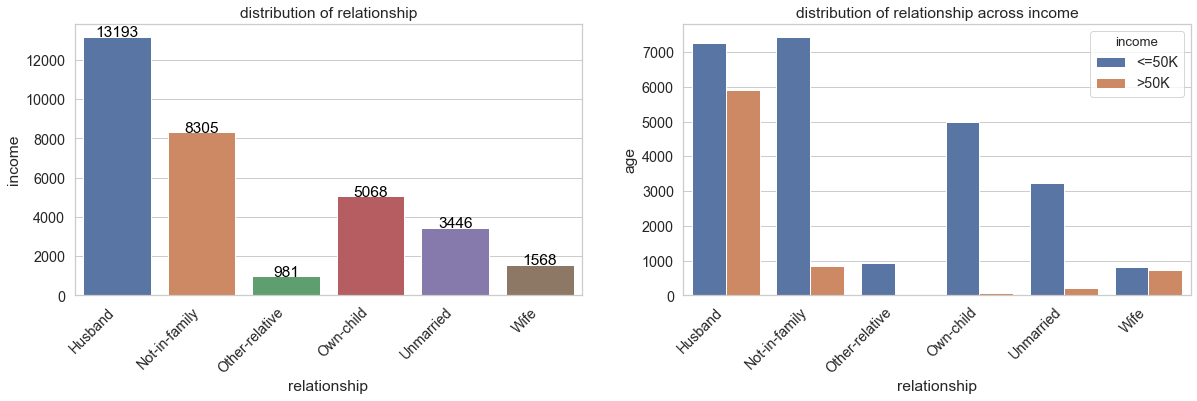

In [195]:
fig, axes = plt.subplots(1,2, figsize=(20,5))


# distribution of worclass
temp = (df.groupby('relationship').count()['income']).reset_index()
figure = sns.barplot(x=temp.relationship, y=temp.income, ax=axes[0])
plt.setp(figure.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure.set_title('distribution of relationship')
for index, row in temp.iterrows():
    figure.text(row.name,row.income, row.income, color='black', ha="center")
    
# distribution of worclass across income 
temp1 = df.groupby(['relationship','income']).age.count().reset_index()
figure1 = sns.barplot(x='relationship' , y= 'age', hue='income',data=temp1, ax=axes[1])
plt.setp(figure1.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure1.set_title('distribution of relationship across income')
plt.show()


relationship: represents what this individual is relative to others. For example an individual could be a Husband. Each entry only has one relationship attribute and is somewhat redundant with marital status. We might not make use of this attribute at all


### 5. race

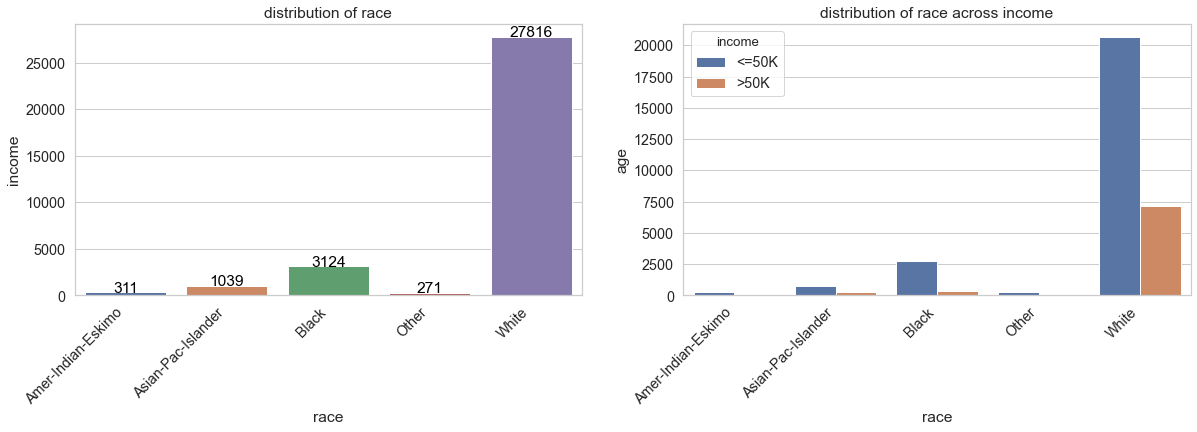

In [196]:
fig, axes = plt.subplots(1,2, figsize=(20,5))


# distribution of worclass
temp = (df.groupby('race').count()['income']).reset_index()
figure = sns.barplot(x=temp.race, y=temp.income, ax=axes[0])
plt.setp(figure.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure.set_title('distribution of race')
for index, row in temp.iterrows():
    figure.text(row.name,row.income, row.income, color='black', ha="center")
    
# distribution of worclass across income 
temp1 = df.groupby(['race','income']).age.count().reset_index()
figure1 = sns.barplot(x='race' , y= 'age', hue='income',data=temp1, ax=axes[1])
plt.setp(figure1.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure1.set_title('distribution of race across income')
plt.show()


1. more number of white people in the population 
2. this feature does not show any useful observation. hence may not be used.

### 6.sex

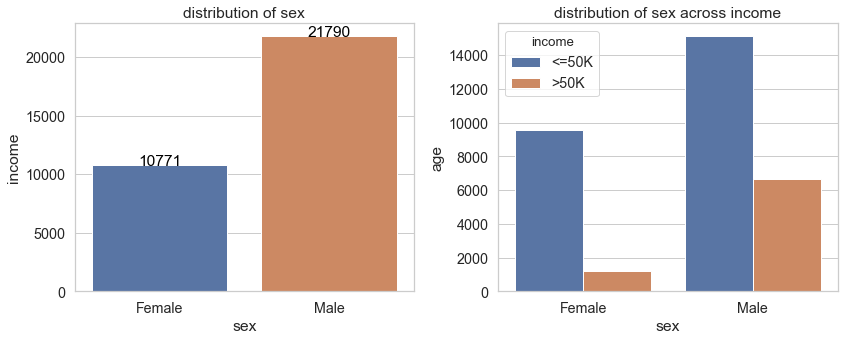

In [214]:
fig, axes = plt.subplots(1,2, figsize=(12,5))


# distribution of worclass
temp = (df.groupby('sex').count()['income']).reset_index()
figure = sns.barplot(x=temp.sex, y=temp.income, ax=axes[0])
figure.set_title('distribution of sex')
for index, row in temp.iterrows():
    figure.text(row.name,row.income, row.income, color='black', ha="center")
    
# distribution of worclass across income 
temp1 = df.groupby(['sex','income']).age.count().reset_index()
figure1 = sns.barplot(x='sex' , y= 'age', hue='income',data=temp1, ax=axes[1])
figure1.set_title('distribution of sex across income')
plt.tight_layout()
plt.show()


1. there are more number of Males who are earning compared to females.

### 7. native_country

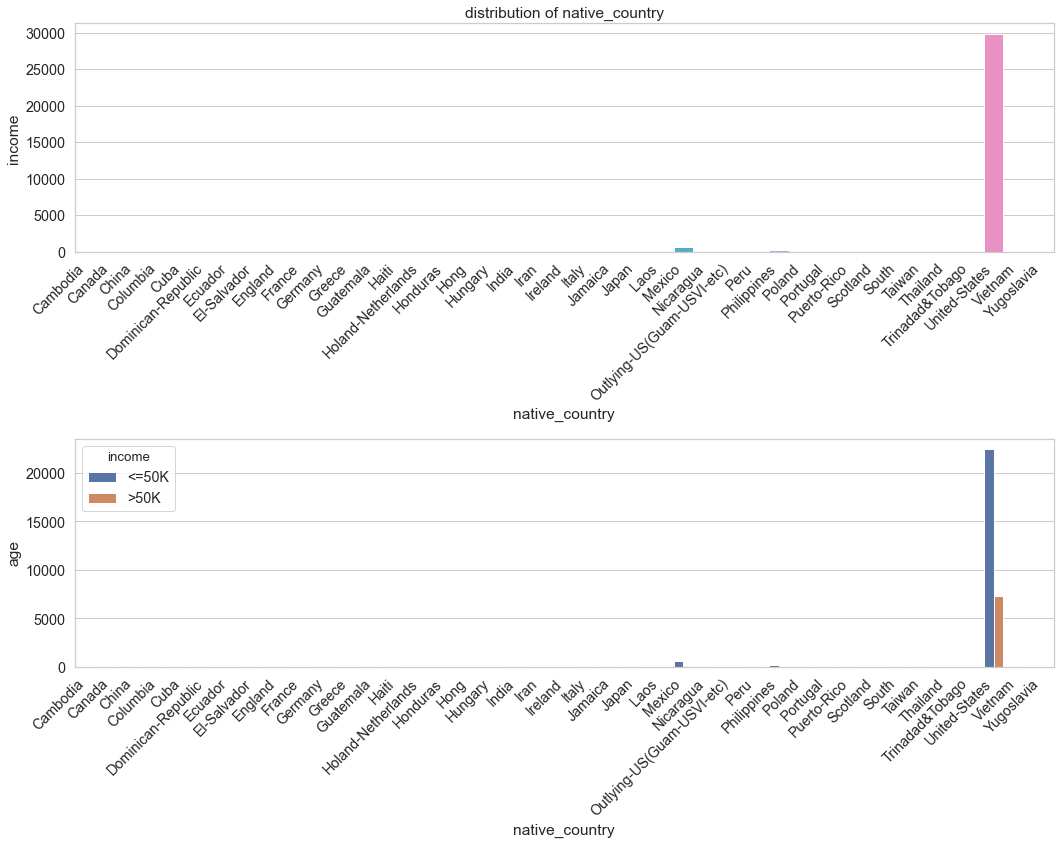

In [219]:
fig, axes = plt.subplots(2,1, figsize=(15,12))


# distribution of worclass
temp = (df.groupby('native_country').count()['income']).reset_index()
figure = sns.barplot(x=temp.native_country, y=temp.income, ax=axes[0])
plt.setp(figure.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure.set_title('distribution of native_country')


# distribution of worclass across income 
temp1 = df.groupby(['native_country','income']).age.count().reset_index()
figure1 = sns.barplot(x='native_country' , y= 'age', hue='income',data=temp1, ax=axes[1])
plt.setp(figure1.get_xticklabels(), rotation=45, horizontalalignment = 'right')
plt.tight_layout()

plt.show()


1. In U.S Low income group make up majoirty of the population.

Since other country data is not visible in this we will take the square root of income column for every category

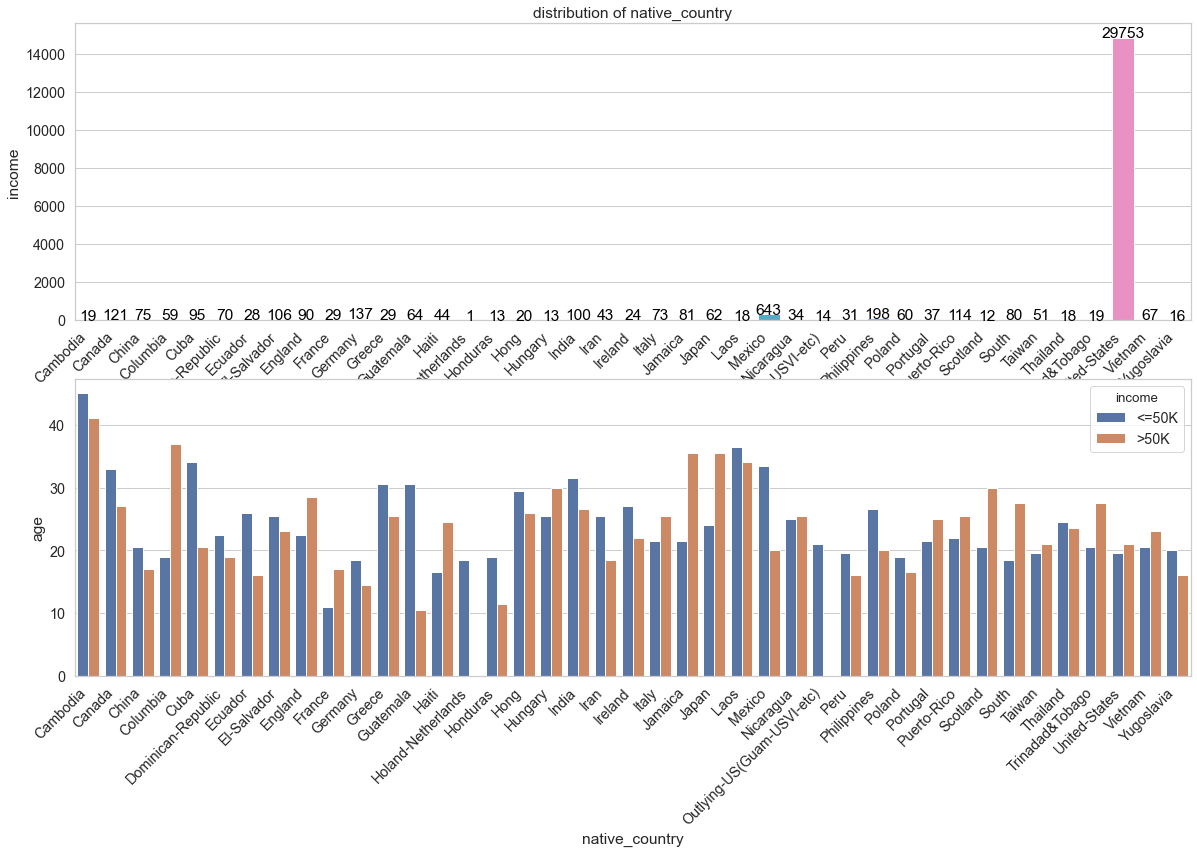

In [238]:
fig, axes = plt.subplots(2,1, figsize=(20,12))


# distribution of worclass
temp = (df.groupby('native_country').count()['income']).reset_index()
figure = sns.barplot(x=temp.native_country, y=0.5*(temp.income), ax=axes[0])
plt.setp(figure.get_xticklabels(), rotation=45, horizontalalignment = 'right')
figure.set_title('distribution of native_country')
for index, row in temp.iterrows():
    figure.text(row.name,0.5*(row.income), (row.income), color='black', ha="center")

# distribution of worclass across income 
temp1 = df.groupby(['native_country','income']).age.count().reset_index()
figure1 = sns.barplot(x='native_country' , y= 0.5*(df['age']), hue='income',data=temp1, ax=axes[1])
plt.setp(figure1.get_xticklabels(), rotation=45, horizontalalignment = 'right')

plt.show()


1. people with Following Native countries
a. Higher income native countries
    1. England
    2. France
    3. Hungary
    4. Jamaica
    5. Japan
    6. Nicaragua
    7. Portugal
    8. Scotland
    9. United State
    
2. people with native country as united state have high salary.


because improper distribution across countries this feature is not useful

## Continuous Variable with respect to Target variable

In [239]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital.gain,capital_loss,hours_per_week,native_country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


### 1. Age

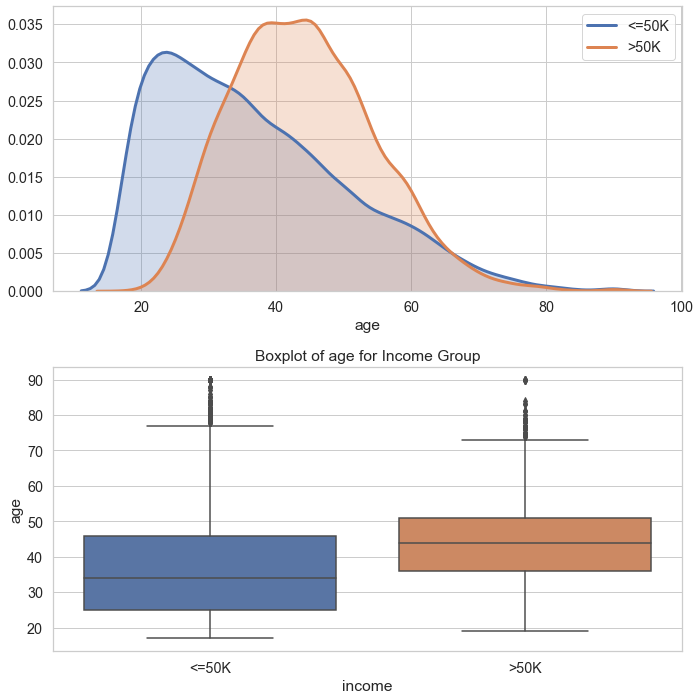

In [294]:
figure,axes = plt.subplots(2,1, figsize=(10,10))

#Figure 1
income_type = np.unique(df['income'].values)
for income in income_type:
    subset = df[df['income'] == income]
    
    sns.distplot(subset['age'], kde=True,hist=False,label=income, kde_kws = {'shade':True, 'linewidth': 3},ax=axes[0])
plt.title('Density Plot of Age with Income type')
plt.xlabel('Age')
plt.ylabel('Density');

# figure 2
sns.boxplot(x='income',y='age', data=df)
plt.title('Boxplot of age for Income Group')
plt.tight_layout()

1. the distribution of Age is right skewed, especially people with <50k income.
2. Higher age people(range 39- 51 yrs) have high income.

### 2. Final Weight

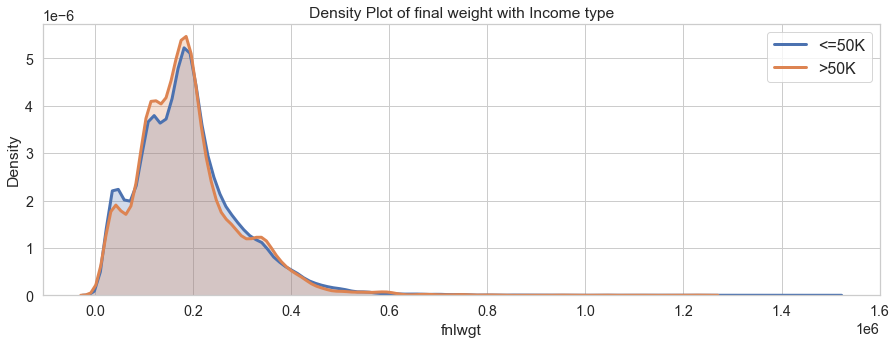

In [280]:
figure = plt.figure(figsize=(15,5))
income_type = np.unique(df['income'].values)
for income in income_type:
    subset = df[df['income'] == income]
    
    sns.distplot(subset['fnlwgt'], kde=True,hist=False,  label=income, kde_kws = {'shade':True, 'linewidth': 3},)
    
plt.legend(prop={'size': 16})
plt.title('Density Plot of Final weight with Income type')
plt.xlabel('fnlwgt')
plt.ylabel('Density');

above graph shows that the weights imposed on every sample of dataset is indepedent of the Income group.


### 3. education_num

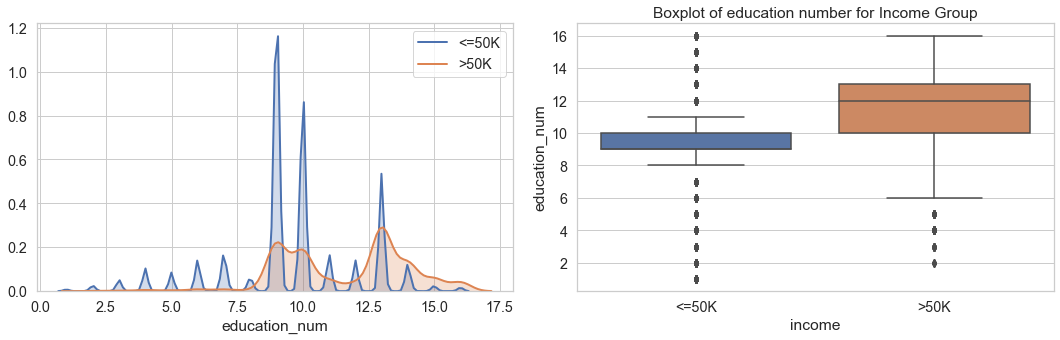

In [297]:
figure ,axes= plt.subplots(1,2,figsize=(15,5))
income_type = np.unique(df['income'].values)
for income in income_type:
    subset = df[df['income'] == income]
    
    sns.distplot(subset['education_num'], kde=True,hist=False,  
                 label=income, kde_kws = {'shade':True, 'linewidth': 2},ax=axes[0])
plt.title('Density Plot of education number with Income type')
plt.xlabel('education_num')
plt.ylabel('Density');


# figure 2
sns.boxplot(x='income',y='education_num', data=df)
plt.title('Boxplot of education number for Income Group')
plt.tight_layout()

1. Graph is multimodal which is obvious thing.
1. People with income of >50k has studied more than 12.5 yrs
2. people with income < 50k have studied on an average 8-10 yrs.
3. there are few people who studied more than 12 yrs but still have lower income.

### 4. Capital Gain

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Boxplot of capital_gain for Income Group')

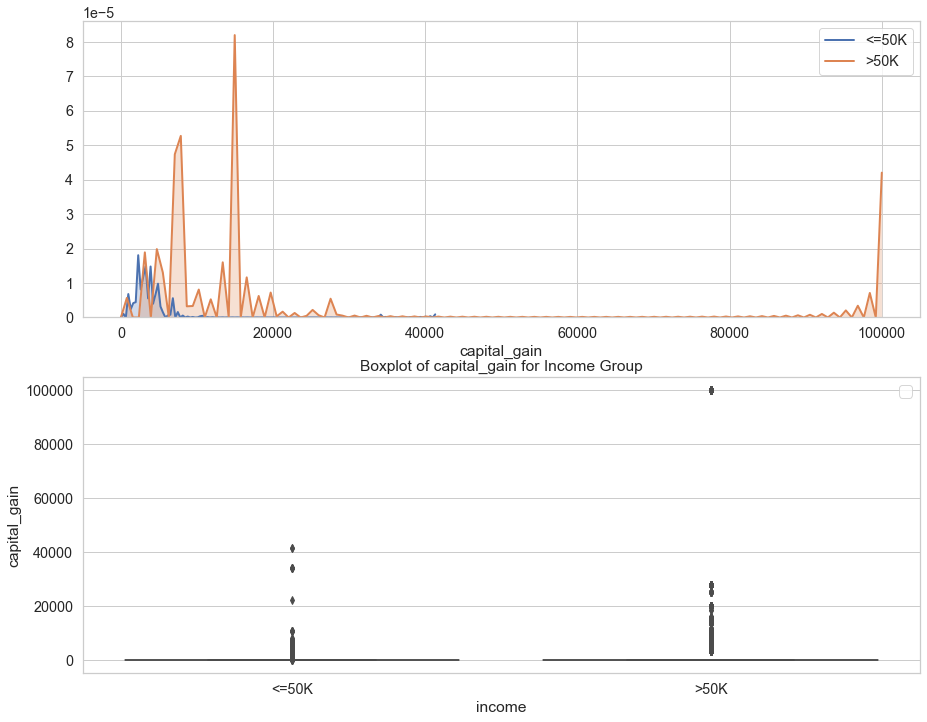

In [310]:
figure,axes = plt.subplots(2,1,figsize=(15,12))
income_type = np.unique(df['income'].values)
for income in income_type:
    subset = df[df['income'] == income]
    
    sns.distplot(subset['capital_gain'],hist=False,kde=True, kde_kws = {'shade':True, 'linewidth': 2,'bw':0.01}
                   , label=income, ax=axes[0])
    
plt.legend(prop={'size': 16})
plt.title('Density Plot of capital gain with Income type')
plt.xlabel('capital gain')
plt.ylabel('Density');

# figure 2
sns.boxplot(x='income',y='capital_gain', data=df)
plt.title('Boxplot of capital_gain for Income Group')


1. the above plot shows People with high Salary (more than 50k) have higher capital gain

### 5. Capital loss

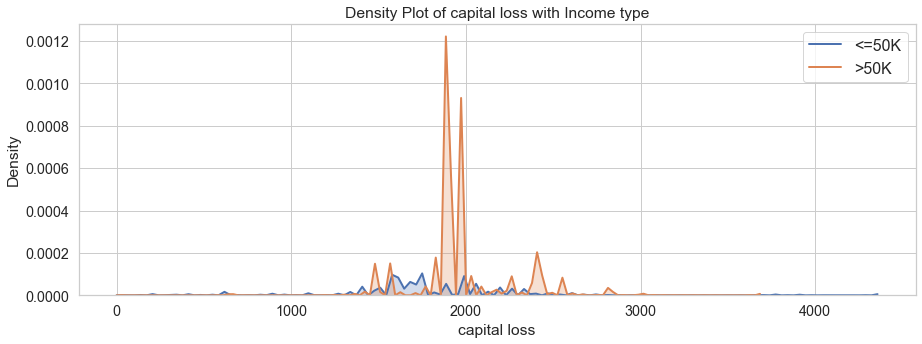

In [276]:
figure = plt.figure(figsize=(15,5))
income_type = np.unique(df['income'].values)
for income in income_type:
    subset = df[df['income'] == income]
    
    sns.distplot(subset['capital_loss'],hist=False,kde=True, kde_kws = {'shade':True, 'linewidth': 2,'bw':0.1}, label=income)
    
plt.legend(prop={'size': 16})
plt.title('Density Plot of capital loss with Income type')
plt.xlabel('capital loss')
plt.ylabel('Density');

1. Capital loss for people with less income is less. one reason behind this can be that they have less no/ few properties.
2. there is huge difference of capital gain and loss in between two income groups

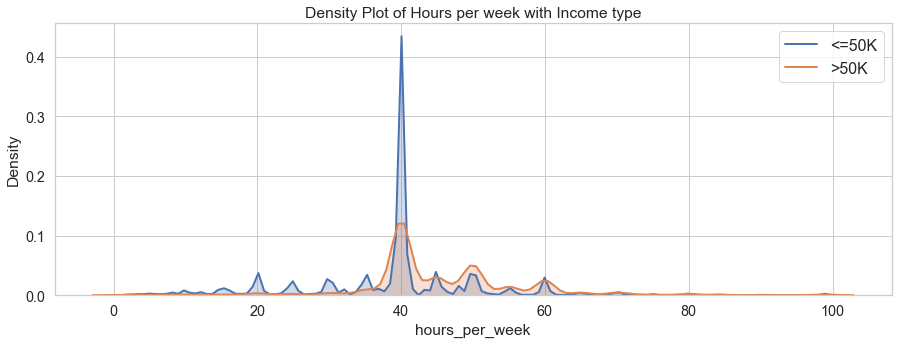

In [275]:
figure = plt.figure(figsize=(15,5))
income_type = np.unique(df['income'].values)
for income in income_type:
    subset = df[df['income'] == income]
    
    sns.distplot(subset['hours_per_week'], kde=True,hist=False,  label=income, kde_kws = {'shade':True, 'linewidth': 2},)
    
plt.legend(prop={'size': 16})
plt.title('Density Plot of Hours per week with Income type')
plt.xlabel('hours_per_week')
plt.ylabel('Density');

1. People who work for more than 40 hours in a week have higher salary.
2. higher proportion of people who have higher salary work on an average of 40 hours.Same is the case for people with lower salary.
3. Distribution is multimodal as expected.

# Correlation

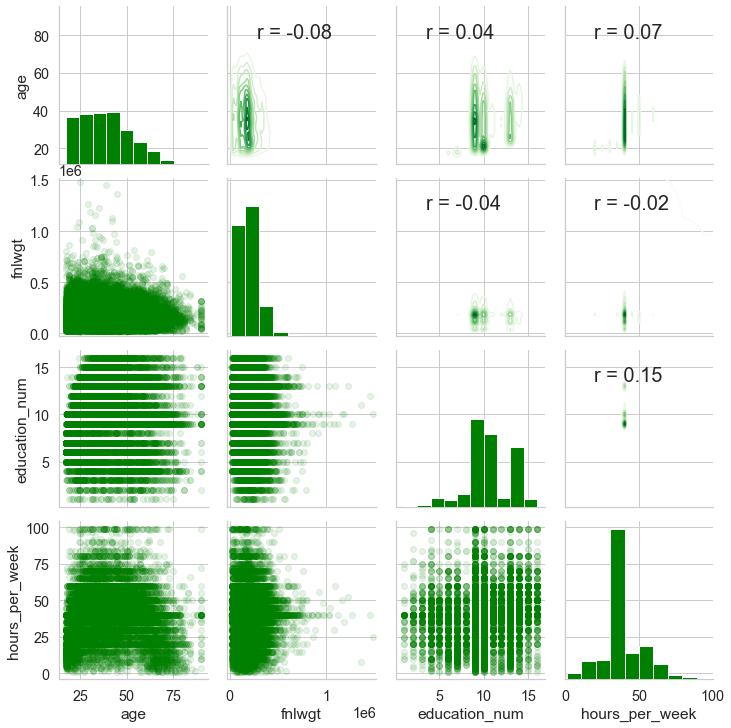

In [14]:
# store continious variables in a list
continuous_variables = ['age','fnlwgt','education_num','hours_per_week']

grid = sns.PairGrid(data = df[continuous_variables])

def hide_current_axis(*args, **kwds):
    plt.gca().set_visible(False)
    
# Upper is a correlation and kdeplot
grid.map_upper(corr_func);
grid.map_upper(sns.kdeplot, cmap = plt.cm.Greens)

# Diagonal is a histogram
grid.map_diag(plt.hist, color = 'green', edgecolor = 'white')

# Bottom is scatter plot
grid.map_lower(plt.scatter, color = 'green', alpha = 0.1)
